In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#Load up trainhr.csv, with index being "employee_id"
data_ori = pd.read_csv("train_hr.csv",index_col = "employee_id")
pd.set_option('display.max_columns', 20)

In [3]:
data = data_ori.copy()

## Input missings

In [4]:

data.education.fillna("Bachelor's",inplace = True)
data.previous_year_rating.fillna(3.0,inplace = True)

## Checking if there are any missings left
data.isnull().sum()/data.isnull().count()

department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

### Converting categorical variables to dummies

In [5]:

dt=pd.get_dummies(data,columns = ["department"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["region"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["education"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["no_of_trainings"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["recruitment_channel"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["previous_year_rating"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["KPIs_met >80%"], drop_first = True)
dt=pd.get_dummies(dt,columns = ["awards_won?"], drop_first = True)
dt=pd.get_dummies(dt,columns = ["gender"], drop_first = True)


In [6]:
dt.head()

,age,length_of_service,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1,gender_m
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,35,8,49,0,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
65141,30,4,60,0,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
7513,34,7,50,0,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
2542,39,10,50,0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
48945,45,2,73,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [7]:
dt.shape

(54808, 71)

### Separating the column to solve Y

In [8]:
y = dt.is_promoted

In [9]:
## Removing Y (is_promoted) from train 
dt.drop("is_promoted",axis = 1, inplace = True)

In [10]:
### Creating train_test_split
x_train,x_test,y_train,y_test=train_test_split(dt,y,test_size=0.2)

In [11]:
##Creating a solver
clf = LogisticRegression(random_state=15, solver='lbfgs')

In [12]:
# Adjusting the model according to the given data
clf=clf.fit(x_train, y_train)

C:\Users\brato\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#prediction
Y_pred=clf.predict(x_test)

In [14]:
# Returning mean accuracy of the first model 
print("Score is:",clf.score(x_train, y_train))
print("Accuracy score is:",accuracy_score(Y_pred, y_test))

Score is: 0.9204488436801532
Accuracy score is: 0.9248312351760628


Takeaway:
- Even if accuracy is 92%. Database is very unbalanced, I should find another metric.


In [15]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[9965  102]
 [ 722  173]]


<AxesSubplot:>

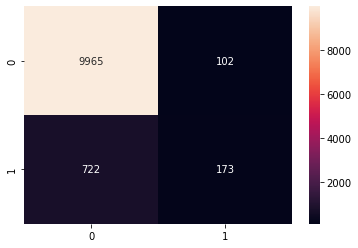

In [16]:

sns.heatmap(cm,annot=True, fmt="d")

ROC Curve receiver operating characteristic curve is plot which shows the performance of a 
binary classifier as function of its cut-off threshold.
It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for various threshold values

In [17]:
from sklearn.metrics import roc_curve
yhat=clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, yhat[:,1])

In [18]:
#AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, yhat[:,1])
print('AUC: %.3f' % auc)

AUC: 0.845


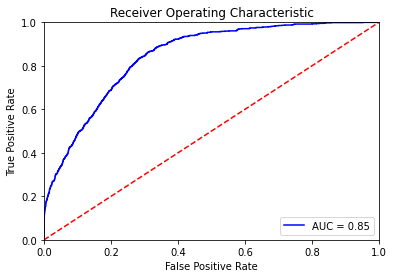

In [19]:
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
#Precision Recall Curve
#The main difference between ROC curves and precision-recall curves is that the number of true-negative results is not used for making a PRC. 
#my Ideal objective is 100% precision and 100% recall
from sklearn.metrics import precision_recall_curve

pos_probs = yhat[:, 1]
precision, recall, _= precision_recall_curve(y_test, pos_probs)

no_skill = len(y[y==1]) / len(y)

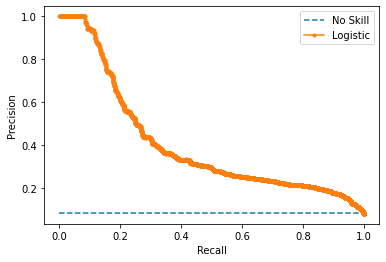

In [25]:
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

We have overfitting between train and test. To secure in this first iteration


In [26]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10067
           1       0.63      0.19      0.30       895

    accuracy                           0.92     10962
   macro avg       0.78      0.59      0.63     10962
weighted avg       0.91      0.92      0.91     10962

